<div style="border-blue: 15px; border-style: solid; border-color:orchid;background-color:turquoise; padding: 15pt">

 # Problema SAT-Peliculas 
   <b>*Alison  Geraldine  Valderrama  Munar*<b>
     </div>


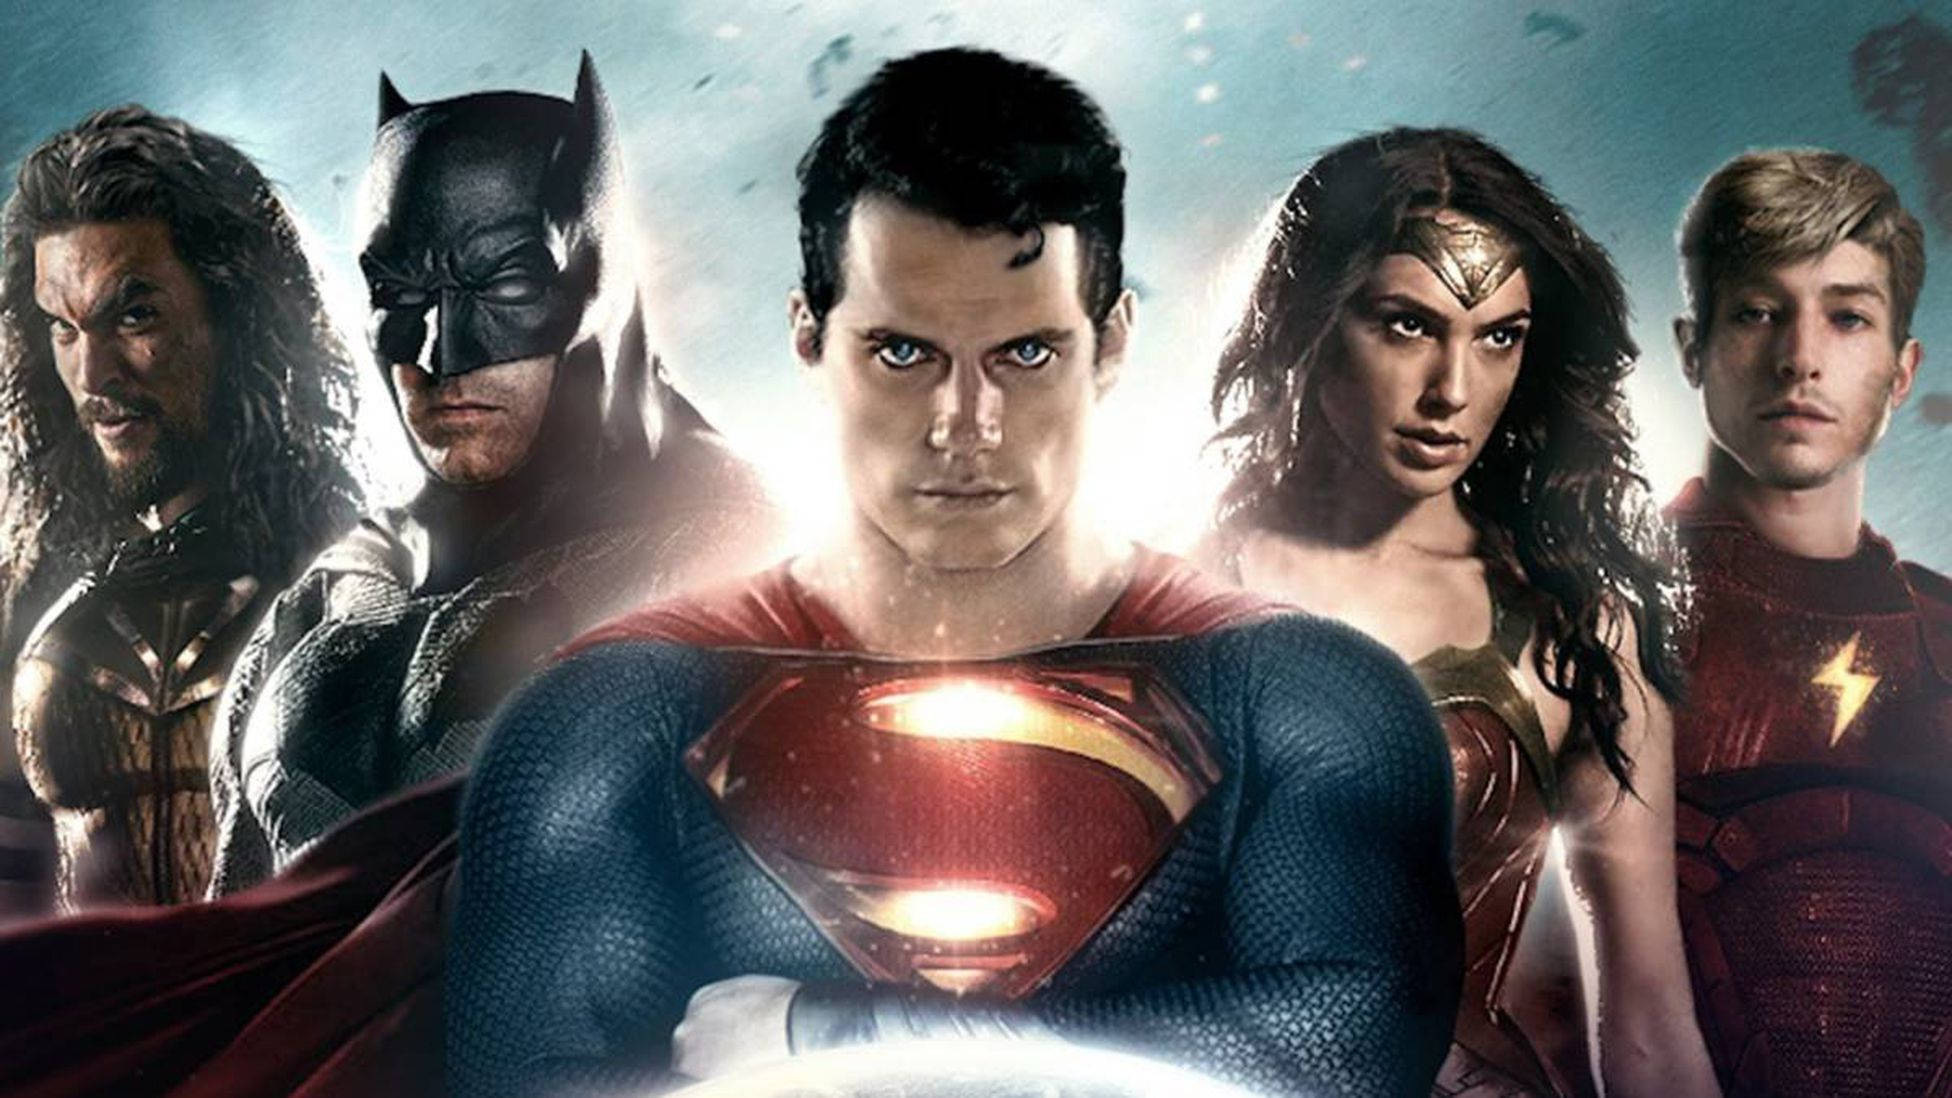

 > En la película aparece Batman o aparece Superman, pero no ambos.
Si no aparece Wonder Woman o aparece Aquaman, entonces no aparece Flash.
Si aparece Superman, entonces aparece Wonder Woman y aparece Flash.

### VARIABLES ###
1. b = Batman
2. s = Superman
3. w = Wonder Woman 
4. a = Aquaman
5. f = Flash

### CONDICIONES ###

- b  ⊕ s
- (¬w ∨ a) → ¬f == ¬(¬(w ∧ ¬a) ∧  f )
- s → w ∧ f == ¬(s ∧ ¬(w ∧ f ))

In [22]:
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

In [23]:
b = QuantumRegister(1, "batman")
s = QuantumRegister(1, "superman")
w = QuantumRegister(1, "wonder")
a = QuantumRegister(1, "aquaman")
f = QuantumRegister(1, "flash")

aux_1 = QuantumRegister(1, "aux_1")
aux_2 = QuantumRegister(1, "aux_2")
aux_3 = QuantumRegister(1, "aux_3")
aux_4 = QuantumRegister(1, "aux_4")
aux_5 = QuantumRegister(1, "aux_5")
aux_6 = QuantumRegister(1, "aux_6")

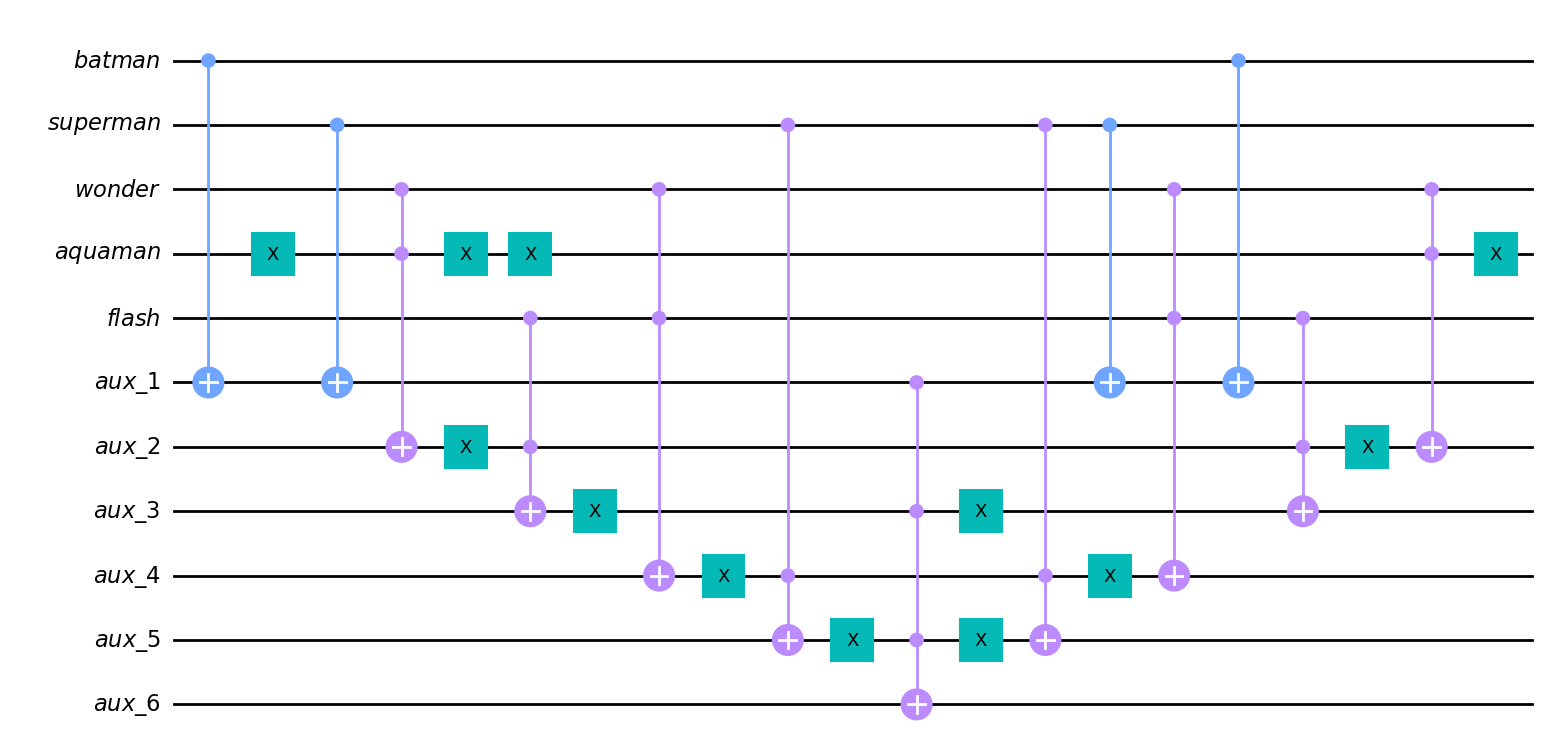

In [24]:
g = QuantumCircuit(b,s,w,a,f,aux_1,aux_2,aux_3,aux_4,aux_5,aux_6)

g.cx(b,aux_1)
g.cx(s,aux_1)

g.x(a)
g.ccx(w,a,aux_2)
g.x(a)
g.x(aux_2)
g.ccx(f,aux_2,aux_3)
g.x(aux_3)

g.ccx(w,f,aux_4)
g.x(aux_4)

g.ccx(s,aux_4,aux_5)
g.x(aux_5)

g.mct([aux_1,aux_3,aux_5],aux_6)

g.x(aux_5)
g.ccx(aux_4,s,aux_5)

g.x(aux_4)
g.ccx(w,f,aux_4)

g.x(aux_3)
g.ccx(aux_2,f,aux_3)
g.x(aux_2)

g.x(a)
g.ccx(w,a,aux_2)
g.x(a)

g.cx(s,aux_1)
g.cx(b,aux_1)

g.draw(output='mpl')

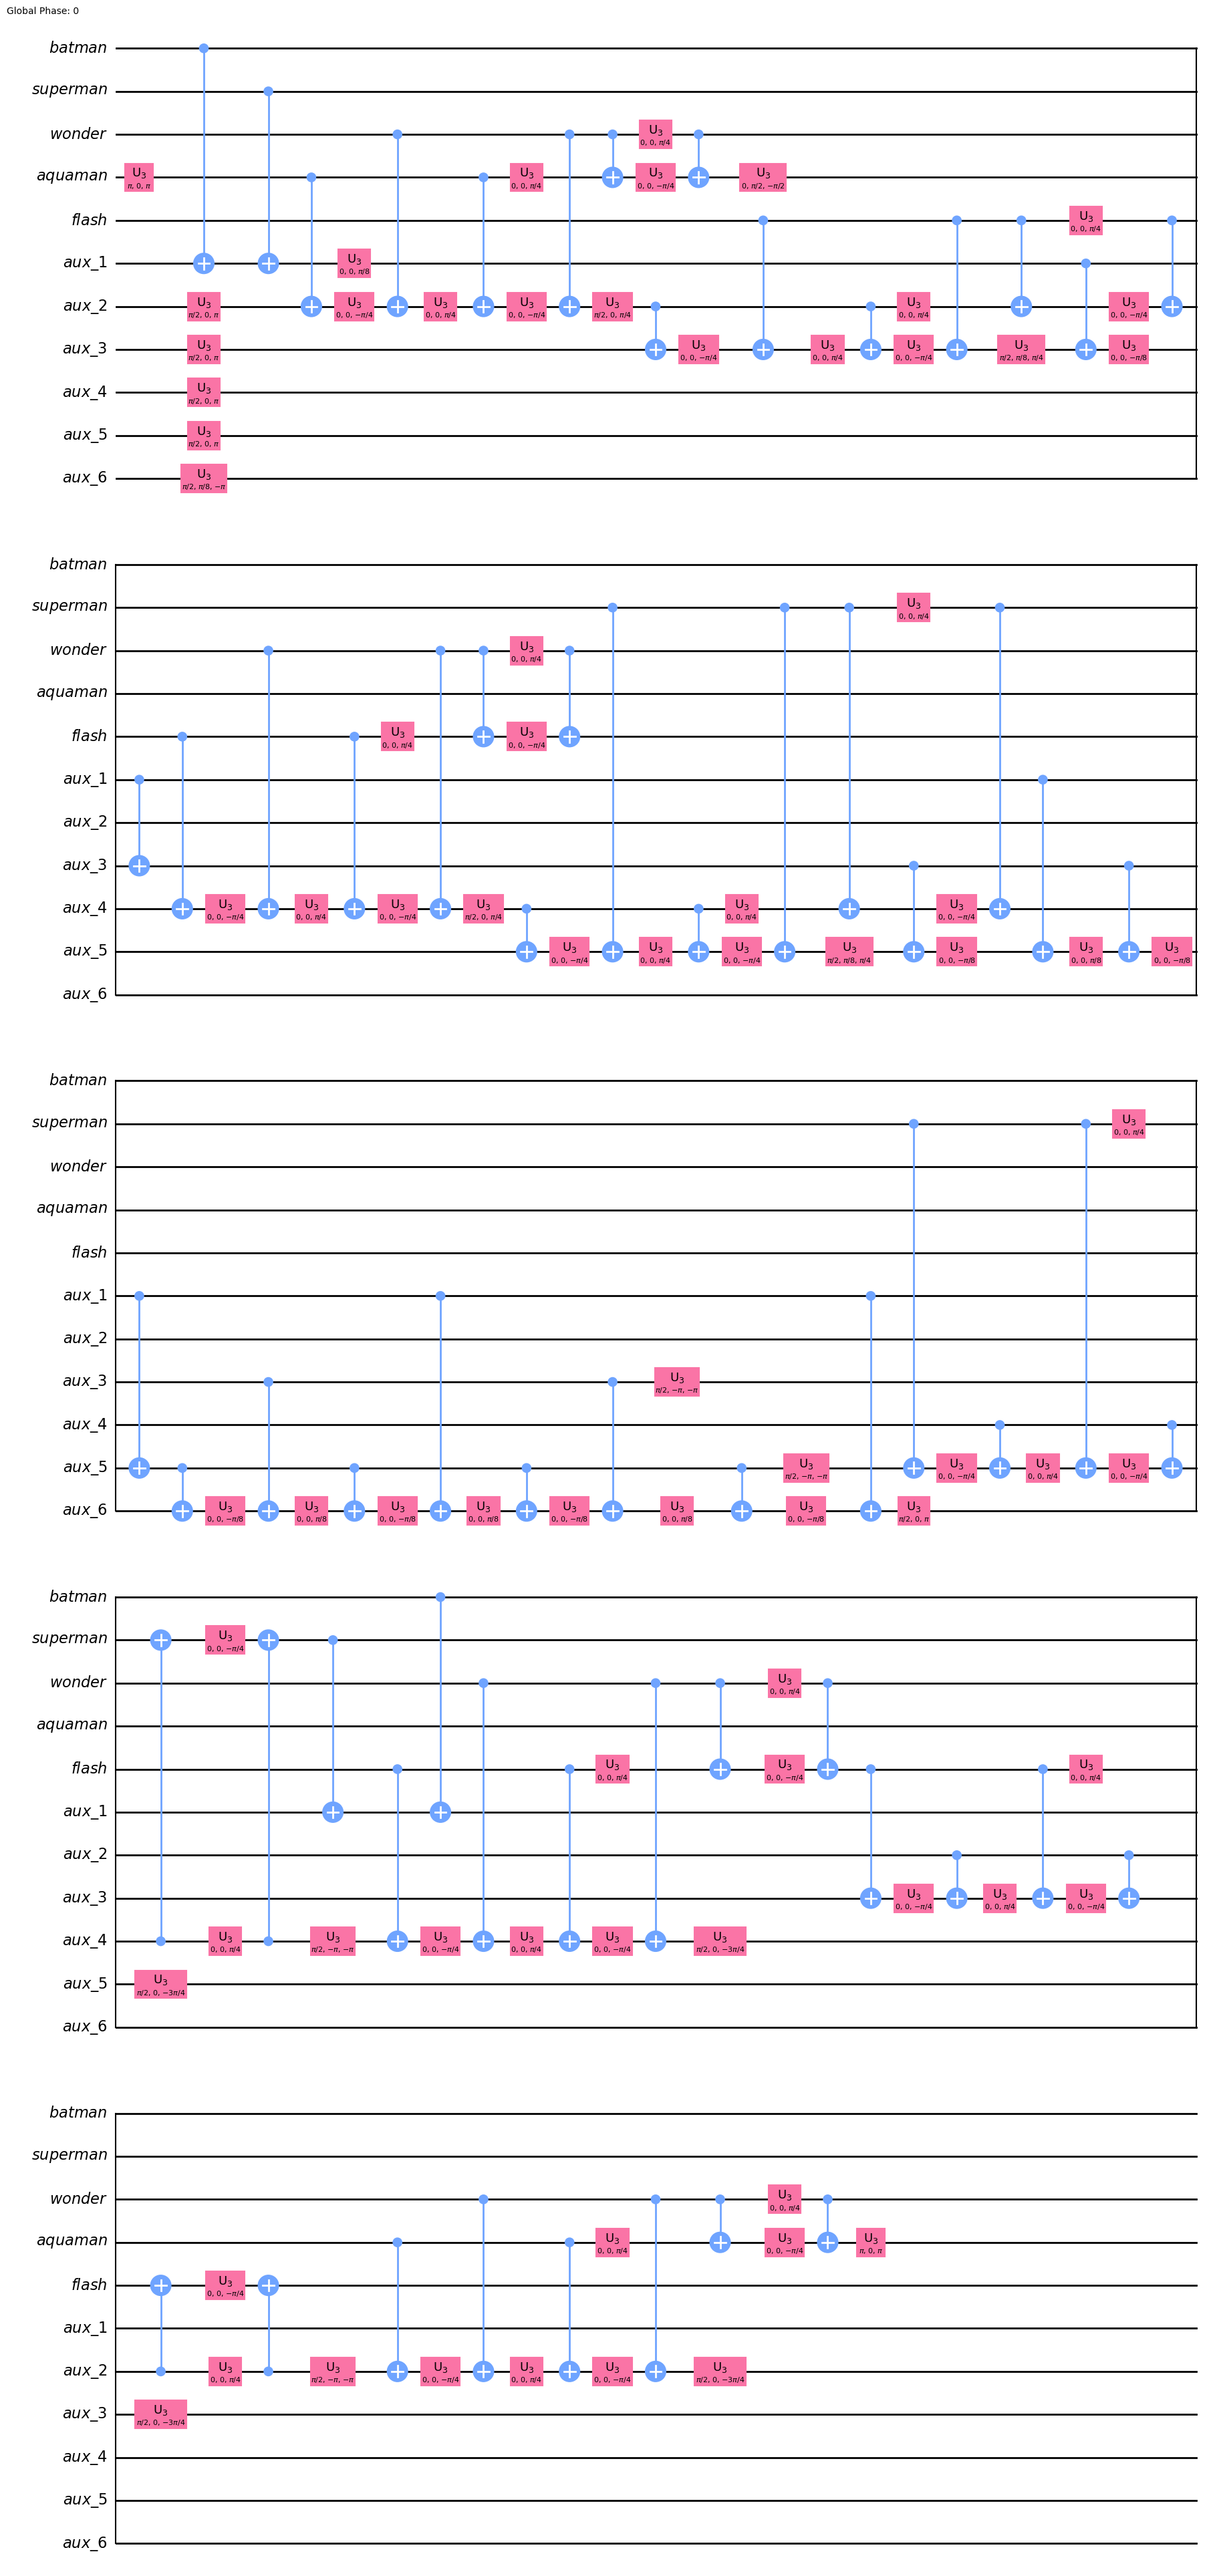

In [25]:
result = transpile(g, basis_gates=["u3","cx"])
result.draw(output="mpl")

In [26]:
costo = result.count_ops()["u3"] + 10*result.count_ops()["cx"]
print(costo)

741


In [27]:
orac = g.to_gate()
orac.name = 'Peliculas'

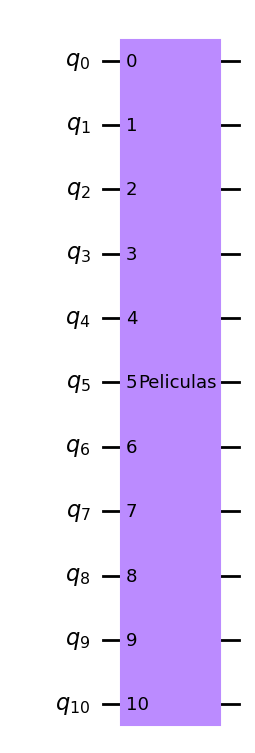

In [28]:
q = QuantumCircuit(11)
q.append(orac, [0, 1, 2, 3,4,5,6,7,8,9,10])
q.draw(output='mpl')

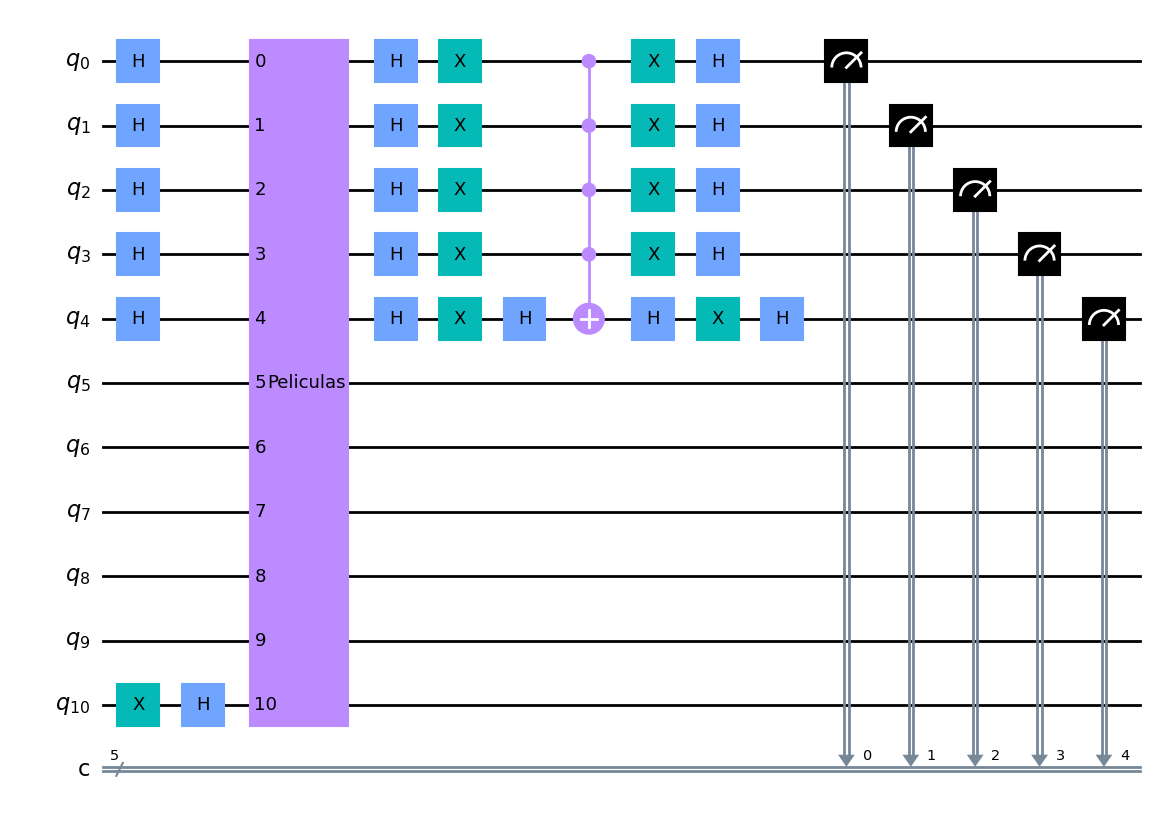

In [29]:
g = QuantumCircuit(11,5)
g.x(10)
g.h(10)
g.h(range(5))
g.append(orac, range(11))
g.h(range(5))
g.x(range(5))
g.h(4)
g.mct([0,1,2,3],4)
g.h(4)
g.x(range(5))
g.h(range(5))
g.measure(range(5),range(5))
g.draw(output = 'mpl')

In [30]:
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(g, backend=simulador, shots=1000) 
resultado = ejecucion.result()
conteos = resultado.get_counts()

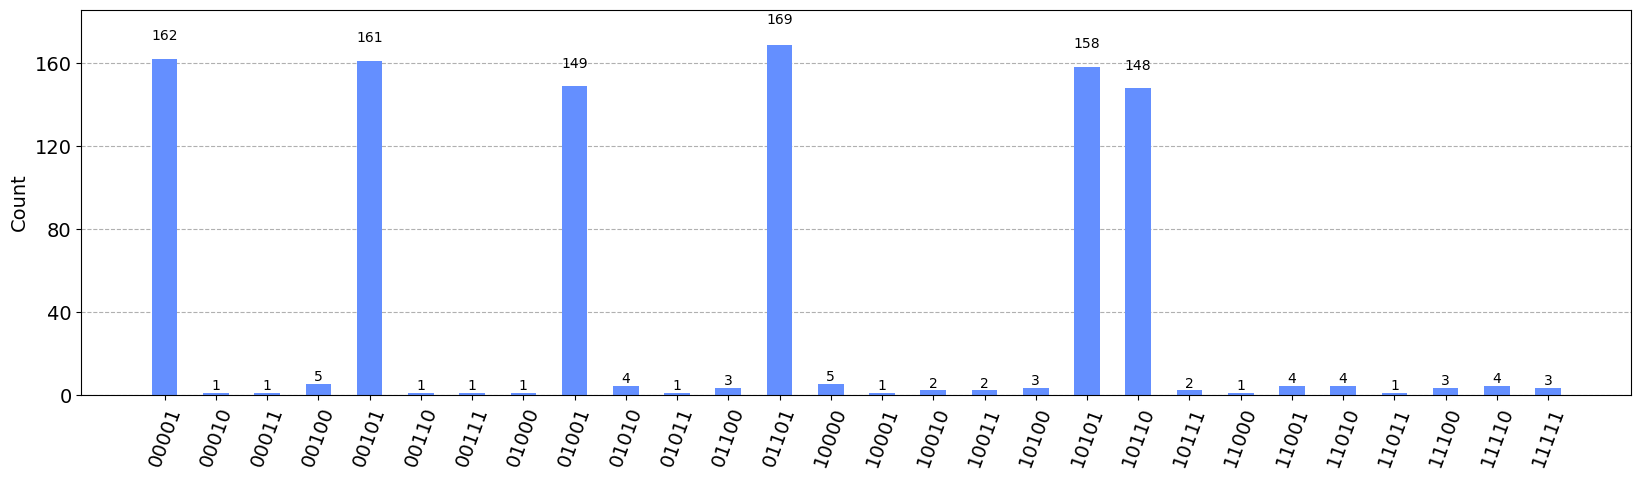

In [31]:
plot_histogram(conteos, figsize=(20,5)) 

## Conclusiones ##

<p style="background-color:black; color:white; padding:33px">Podemos concluir que nuestras cadenas definitvas son las 
    $-|00001\rangle$ 
    $-|00101\rangle$ 
    $-|01001\rangle$
    $-|01101\rangle$
    $-|10101\rangle$
    $-|10110\rangle$
    <span style="font-size:30px"> 🏆</span> </p> 

Las peliculas puede ser de las siguientes personajes 

## 1  Pelicula de Batman ##

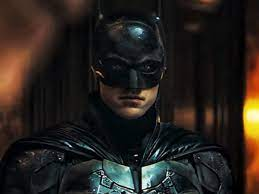

## 2 Pelicula de Batman y Aquaman ##

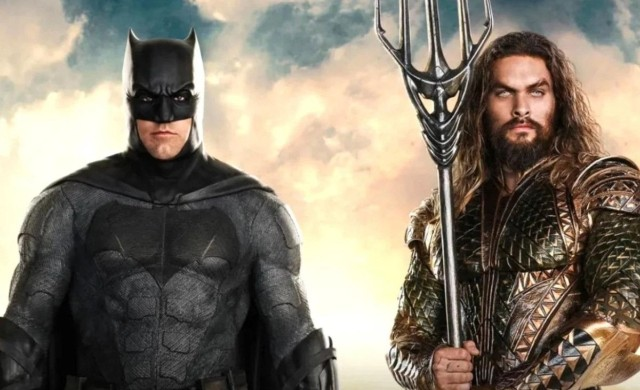

## 3  Pelicula de Batman y Wonder woman ##

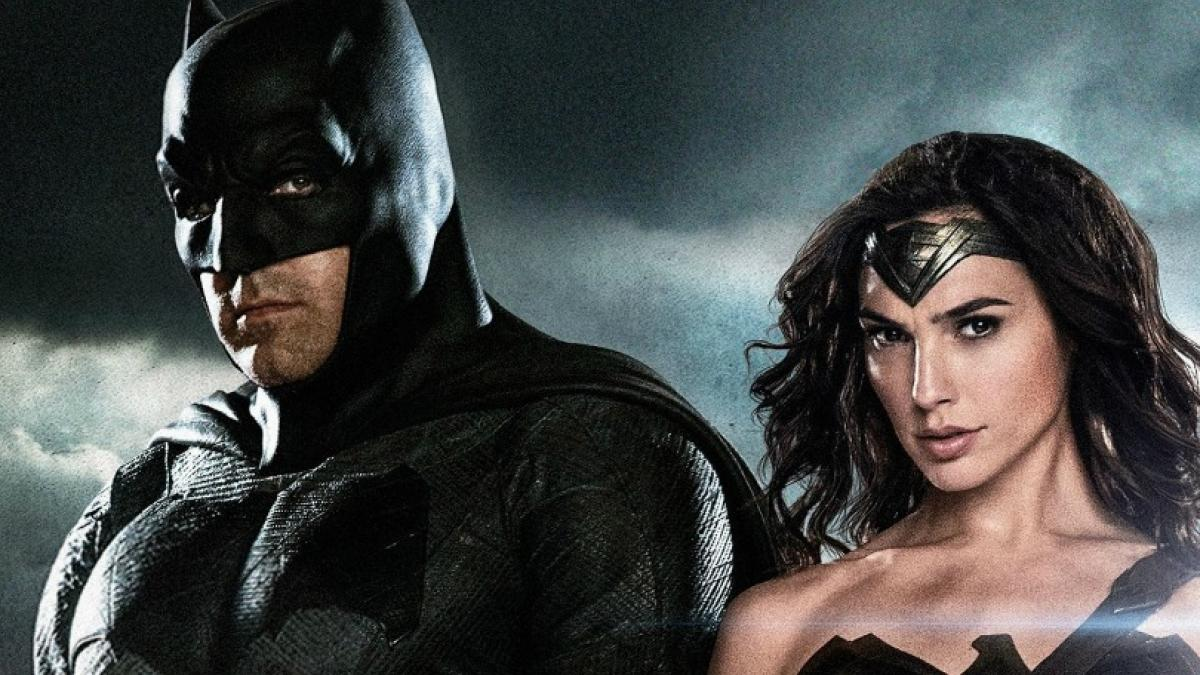

## 4 Pelicula de Batman, Aquaman y Wonder woman ##

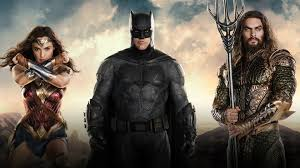

## 5  Pelicula de Batman, Wonder woman y Flash ##

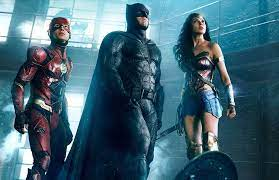

## 6  Pelicula de Superman, Wonder woman y Flash ##

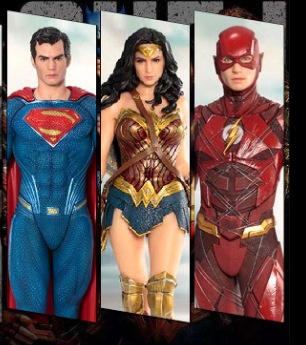

<p style="background-color:lightgreen; color:blue; padding:30px">  ¿Que pelicula iras a ver?  <span style="font-size:30px"> 😎🎥🍿🎞️🎬​</span>